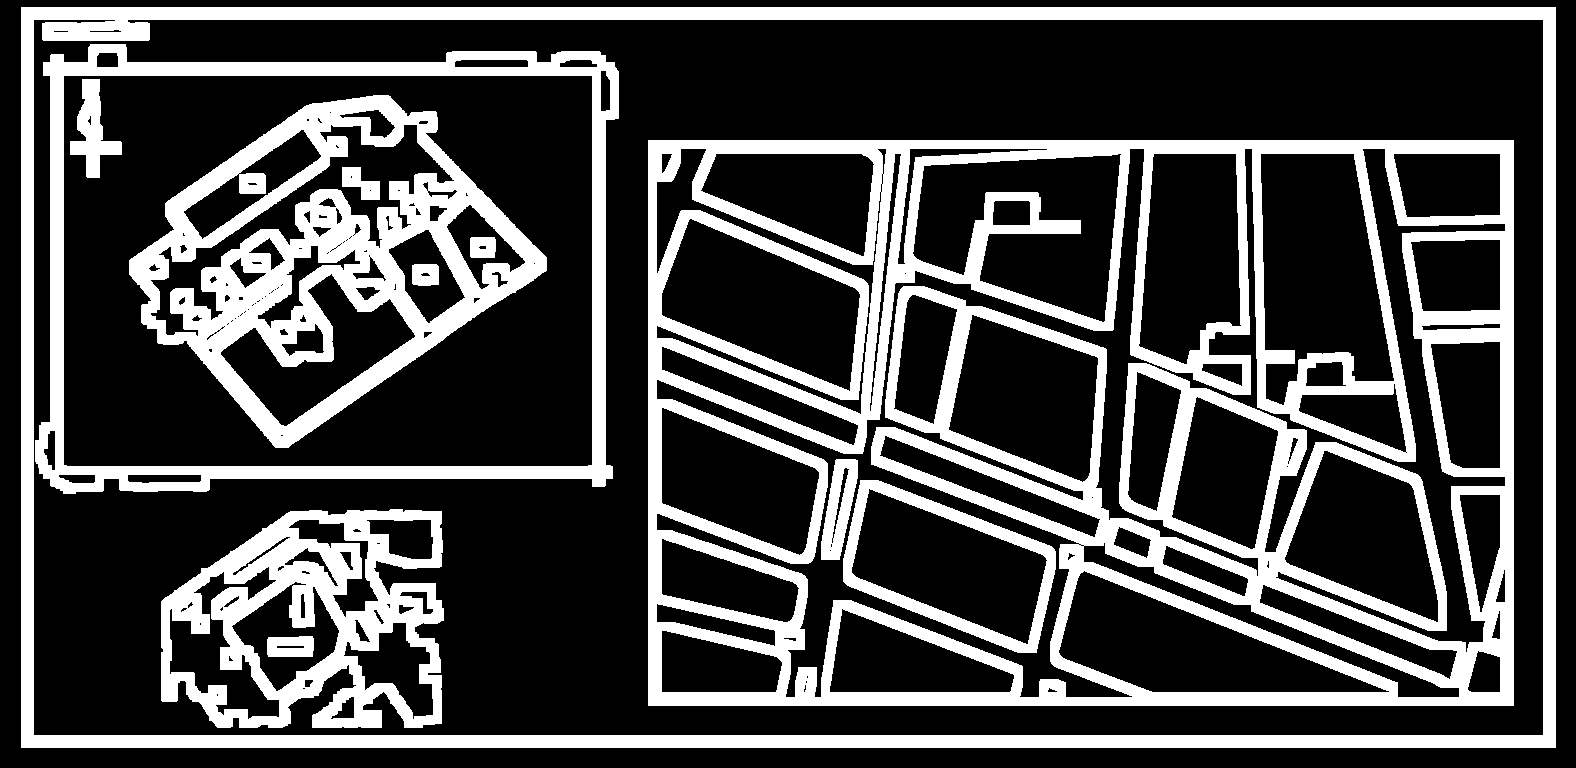

In [46]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

image_path = '../test_data/input/test_1.png'  # 画像パスを指定

# 画像の読み込み
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 二値化処理
_, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)


# カーネルの定義
kernel_s = np.ones((3,3), np.uint8)
kernel_m = np.ones((7,7), np.uint8)
kernel_l = np.ones((15,15), np.uint8)

# ノイズ除去のための処理
# まず小さなノイズを除去
denoised = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_s)

# 文字や線などの細かい要素を除去
text_removed = cv2.morphologyEx(denoised, cv2.MORPH_OPEN, kernel_m)
text_removed = binary

# 物体領域の強調
dilated = cv2.dilate(text_removed, kernel_m, iterations=2)

# 物体の中心部分の抽出
eroded = cv2.erode(dilated, kernel_m, iterations=3)

# 物体領域の復元
reconstructed = cv2.dilate(eroded, kernel_m, iterations=3)

# 差分による物体検出
# 膨張処理と収縮処理の差分を取ることで、物体の境界を検出
diff = cv2.absdiff(dilated, eroded)

# 物体の中心を見つけるための処理
center_markers = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel_l)

display(Image.fromarray(diff))

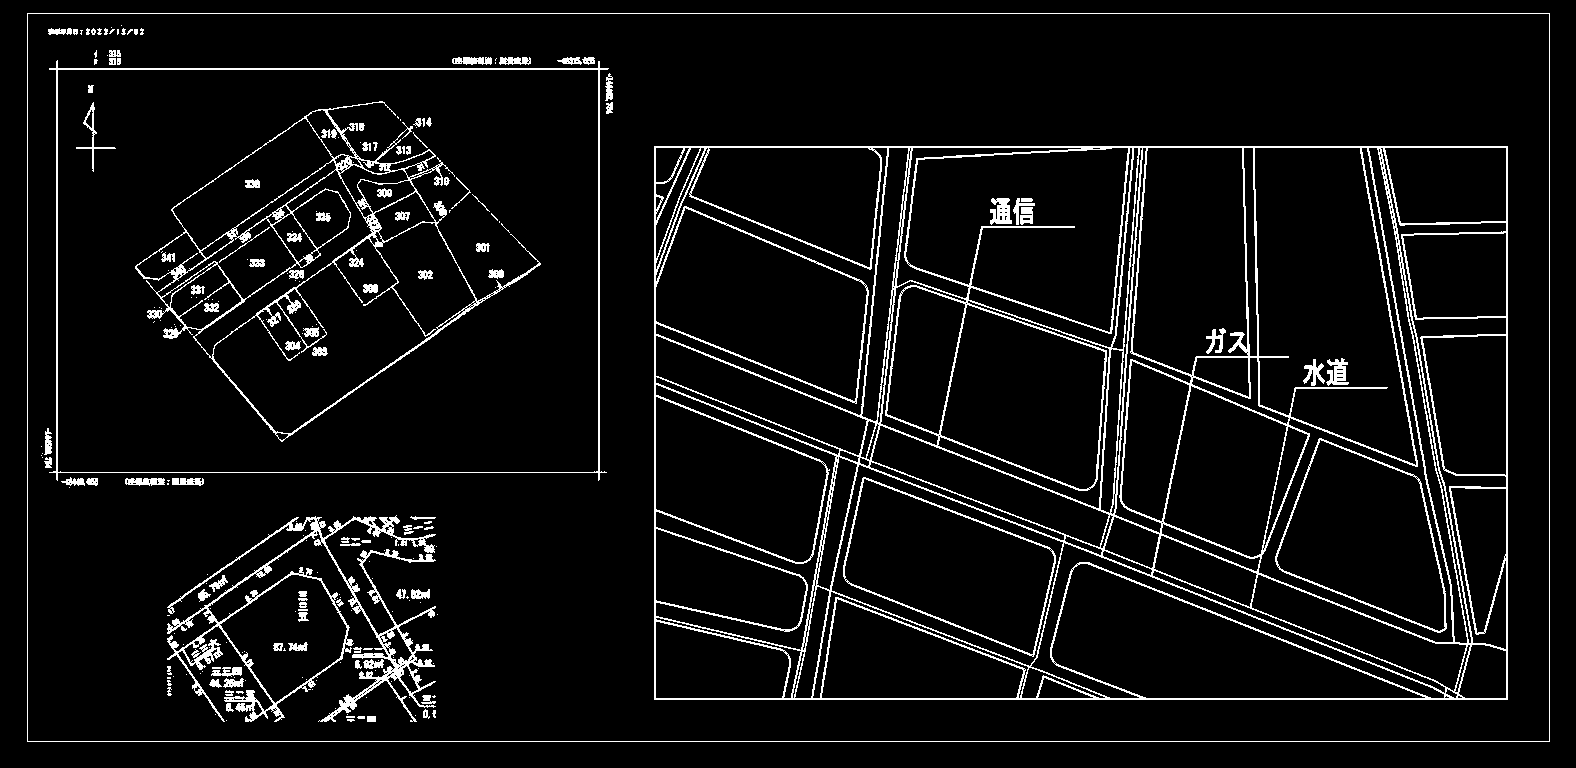

In [55]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

image_path = '../test_data/input/test_1.png'  # 画像パスを指定

# 画像の読み込み
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 二値化処理
_, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# カーネルの定義
kernel_s = np.ones((3,3), np.uint8)
kernel_m = np.ones((7,7), np.uint8)
kernel_l = np.ones((15,15), np.uint8)

#
close = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_s, iterations=1)

# 物体領域の強調
# dilated = cv2.dilate(text_removed, kernel_m, iterations=2)

# 物体の中心部分の抽出
# eroded = cv2.erode(dilated, kernel_m, iterations=3)

# 物体領域の復元
# reconstructed = cv2.dilate(eroded, kernel_m, iterations=3)

# 差分による物体検出
# 膨張処理と収縮処理の差分を取ることで、物体の境界を検出
diff = cv2.absdiff(binary, close)

# 物体の中心を見つけるための処理
center_markers = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel_l)

display(Image.fromarray(binary))